In [1]:
import sys

In [2]:
sys.path.append('../../')

In [3]:
import driver

Please install s3fs if retrieving from the Amazon S3 Servers.  Otherwise continue with local data
Please install h5py to open files from the Amazon S3 servers.
Please install h5netcdf to open files from the Amazon S3 servers.


In [4]:
an = driver.analysis()

In [5]:
an.control = '../yaml/control_tropomi_l2_no2.yaml'
an.read_control()
an.open_obs()

Reading TROPOMI L2 NO2
/Users/mengli/Work/melodies-monet/obsdata/tropomi_no2/*
reading /Users/mengli/Work/melodies-monet/obsdata/tropomi_no2/S5P_OFFL_L2__NO2____20220430T222541_20220501T000711_23559_02_020301_20220502T140952.nc
qa_value
nitrogendioxide_tropospheric_column
lon
DEBUG:root:lon
lat
DEBUG:root:lat
qa_value
nitrogendioxide_tropospheric_column
DEBUG:root:nitrogendioxide_tropospheric_column


In [6]:
an.obs['tropomi_l2_no2'].obj

OrderedDict([('20220430',
              <xarray.Dataset>
              Dimensions:                              (dim_0: 4173, dim_1: 450)
              Dimensions without coordinates: dim_0, dim_1
              Data variables:
                  lon                                  (dim_0, dim_1) float32 nan nan ... nan
                  lat                                  (dim_0, dim_1) float32 nan nan ... nan
                  qa_value                             (dim_0, dim_1) float32 0.0 0.0 ... 0.0
                  nitrogendioxide_tropospheric_column  (dim_0, dim_1) float32 nan nan ... nan
              Attributes:
                  quality_flag:        qa_value
                  quality_thresh_min:  0.7)])

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np



DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7ff68d7943d0>


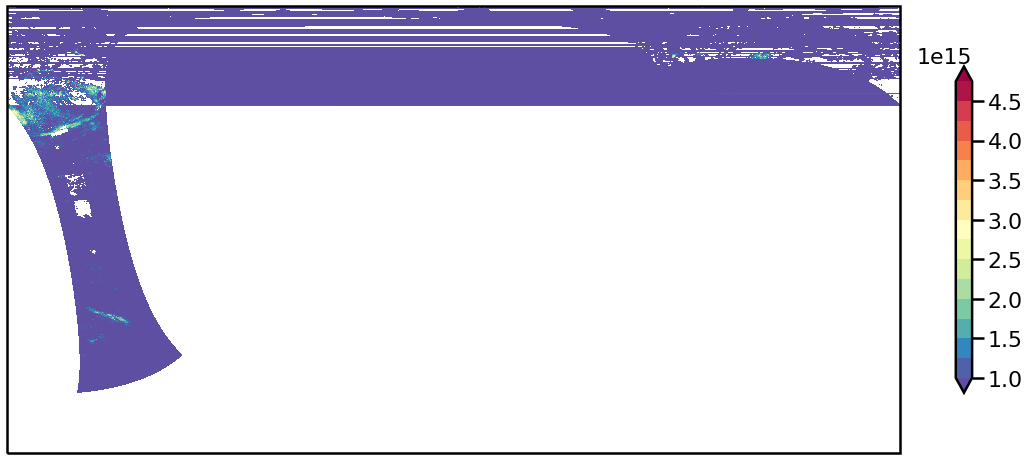

In [9]:
lon = an.obs['tropomi_l2_no2'].obj['20220430']['lon']
lat = an.obs['tropomi_l2_no2'].obj['20220430']['lat']
no2 = an.obs['tropomi_l2_no2'].obj['20220430']['nitrogendioxide_tropospheric_column']

plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
clev = np.arange(1*1e15, 5.0*1e15, 0.25*1e15)
plt.contourf(lon, lat, no2, clev, cmap='Spectral_r', extend='both')
cbar=plt.colorbar(shrink=0.6)